In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Clustering Algorithm

In [2]:
# Clustering algorithms are unsupervised algorithms where the training data is not labeled
# Rather, the algorithms cluster or group the data based on common characteristics

# K-Means Clustering
# Hierarchical clustering

In [3]:
#K-Means clustering- K- Means clustering is one of the most commonly used algorithms for
# clustering unlabeled data. In K-means clustering, K refers to the number of clusters that 
# you want your data to be grouped into. In K-Means clustering, the number of clusters has to be defined before
# K clustering can be applied to the data points.

#Steps
# Randomly assign centroid values for each cluster
# Calculate the distance (Euclidean or Manhattan) between each data point and centroid values of 
# all the clusters
# Assign the data point to the cluster of the centroid with the shortest distance
# Calculate and update centroid values based on the mean values f the coordinates of all
# the data points of the corresponding cluster
# Repeat steps 2-4 until new centroid values for all the clusters are different
# from the previous centroid values

# Advantages
# K-Means clustering is a simple to implement algorithm
# Can be applied to large datasets
# Scales well to unseen data points
# Generalizes well to clusters of various sizes and shapes

In [4]:

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

Customer Segmentation using K-means clustering

In [5]:
# We will see how to segment customers based on their incomes and
# past spending habits

dataset= pd.read_csv("Mall_Customers.csv")

dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# The spending score is the score assigned to customers based on their previous spending habits
# Customers with higher spending in the past have higher scores

dataset.shape

(200, 5)

C:\Users\Anupam\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)'>

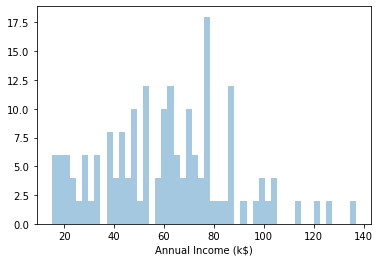

In [7]:
sns.distplot(dataset["Annual Income (k$)"], kde=False, bins=50)

In [8]:
# The above output shoes that most customers have incomes between 60 and 90K per year

<AxesSubplot:xlabel='Spending Score (1-100)'>

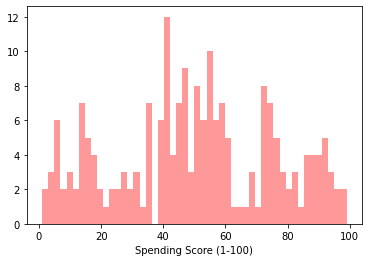

In [9]:
sns.distplot(dataset["Spending Score (1-100)"], kde=False, bins=50, color="red")

In [10]:
# The above output shows that most of the customers have a spending score between 40 & 60

In [11]:
# We can also plot a regression line between annual income and spending score to see if there is any 
# linear relationship between the two or not

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

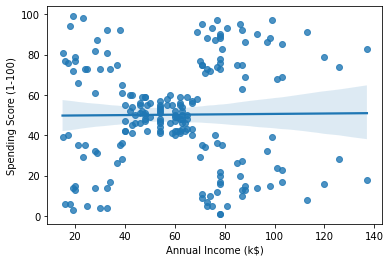

In [12]:
sns.regplot(x="Annual Income (k$)",y="Spending Score (1-100)", data=dataset)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

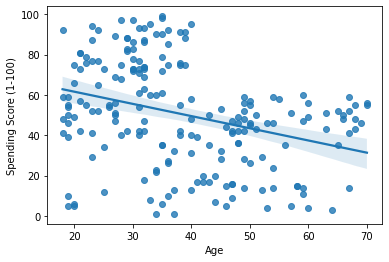

In [13]:
sns.regplot(x="Age",y="Spending Score (1-100)", data=dataset)

In [14]:
# The output above confirms an inverse linear relationship between age and spending score.
# It can be inferred from the output that young people have higher spending
# compared to older people

In [15]:
# filtering annual income and spending score columns and removing remaining columns

dataset=dataset.filter(["Annual Income (k$)","Spending Score (1-100)"], axis=1)

dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [16]:
km_model= KMeans(n_clusters=4)
km_model.fit(dataset)

KMeans(n_clusters=4)

In [17]:
# Once the model is trained, you can print the cluster centers

print(km_model.cluster_centers_)

[[48.26       56.48      ]
 [87.         18.63157895]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


In [18]:
# In addition to finding cluster centers, the K-Means class also assigns a cluster label
# to each data point. The cluster labels are numbers that basically serve as cluster id

print(km_model.labels_)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


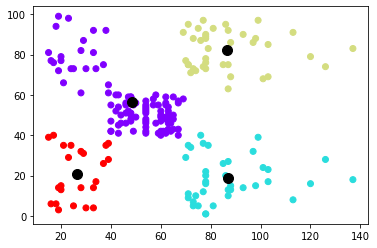

In [19]:
# print the data points
plt.scatter(dataset.values[:,0], dataset.values[:,1], c=km_model.labels_, cmap='rainbow')

# print the centroids

plt.scatter(km_model.cluster_centers_[:,0],km_model.cluster_centers_[:,1], s=100, c="black")

In [20]:
# to find the optimal number of customer segments, we need to find the optimal number of K 
# because K defines the number of clusters. There is a way to find the ideal number of clusters.
# The method is known as elbow method.

# In the elbow method, the value of inertia obtained by training K-Means cluster with 
# different number of K is plotted on a graph.

# The inertia represents the total distance between the data points within a cluster.
# Smaller inertia means that the predicted clusters are robust and close to the actual clusters.

C:\Users\Anupam\anaconda3new\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


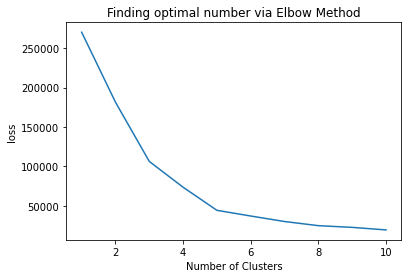

In [21]:
# training Kmeans on K values from 1 to 10

loss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i).fit(dataset)
    loss.append(km.inertia_)
    
plt.plot(range(1,11),loss)
plt.title('Finding optimal number via Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('loss')
plt.show()

In [22]:
# From the output above, it can be seen that the value of inertia didn't decrease much after five clusters

In [23]:
km_model=KMeans(n_clusters=5)
km_model.fit(dataset)

KMeans(n_clusters=5)

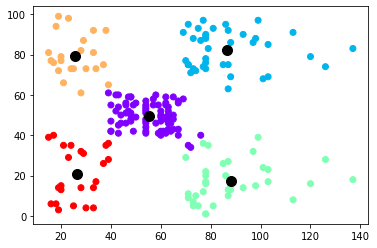

In [24]:
# print the data points
plt.scatter(dataset.values[:,0], dataset.values[:,1], c=km_model.labels_, cmap='rainbow')

# print the centroids

plt.scatter(km_model.cluster_centers_[:,0],km_model.cluster_centers_[:,1], s=100, c="black")

In [25]:
# From the above output, you can see that the customers are divided into five segments. The
# customers in the middle of the plot are the customers with average income and average spending.
# You need to target the customers who belong to the top right cluster. These are the customers
# with high incomes and high spending in the past and they are more likely to spend in the future as well.
# So any new marketing campaigns or advertisements should be directed to these customers.

In [26]:
print(km_model.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


In [27]:
cluster_map=pd.DataFrame()
cluster_map['data_index']=dataset.index.values
cluster_map['cluster']=km_model.labels_
cluster_map

,data_index,cluster
0,0,4
1,1,3
2,2,4
3,3,3
4,4,4
...,...,...
195,195,1
196,196,2
197,197,1
198,198,2


In [28]:
cluster_map= cluster_map[cluster_map.cluster==2]
cluster_map.head()

,data_index,cluster
124,124,2
128,128,2
130,130,2
134,134,2
136,136,2


In [29]:
# These are the customers who have high incomes and high spending and these customers should be targeted
# during marketing campaigns